<a href="https://colab.research.google.com/github/rlerikse/josh-scholes-option-bot/blob/master/BetBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent nerual network called Long Short Term Memory (LSTM)
#              to predict the closing stock prices of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import csv
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Import game data
from google.colab import files 
file = files.upload()

In [ ]:
#Assign data to data frame
df = pd.read_csv('2021-11-11_06-00-PM_EST_NCAAB_Vermont_Catamounts-@-Northern_Iowa_Panthers-betmgm.csv')
df

,overPrice,overPoint,underPrice,underPoint,timestamp
0,1.87,131.5,1.91,131.5,06:00:21 PM
1,1.87,131.5,1.91,131.5,06:00:52 PM
2,1.87,131.5,1.91,131.5,06:01:23 PM
3,1.87,131.5,1.91,131.5,06:01:54 PM
4,1.87,131.5,1.91,131.5,06:02:25 PM
...,...,...,...,...,...
788,1.83,125.5,1.95,125.5,07:42:53 PM
789,1.83,125.5,1.95,125.5,07:42:59 PM
790,1.83,125.5,1.95,125.5,07:43:06 PM
791,1.83,125.5,1.95,125.5,07:43:51 PM


In [ ]:
df.shape

(793, 5)

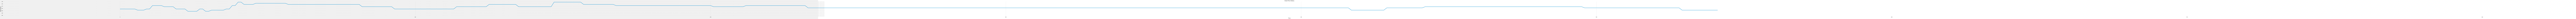

In [ ]:
#Visualize total point score through game
plt.figure(figsize=(793,5))
plt.title('Close Price History')
plt.plot(df['overPoint'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Total Points', fontsize=18)
plt.show()

In [ ]:
#Create a new datafram with only the overPoint history
data = df.filter(['overPoint'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .35)

training_data_len

278

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.41666667],
       [0.41666667],
       [0.41666667],
       [0.5       ],
       [0.5       ],
       [0.75      ],
       [0.75      ],
       [0.75      ],
       [0.75      ],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.66666667],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.5       ],
       [0.5       ],
       [0.33333333],
       [0.33333333],
       [0.41666667],
       [0.41666667],
       [0.41666667],
       [0.41666667],
       [0.41666667],
       [0.5       ],
       [0.5       ],
       [0.75      ],
       [0.75      ],
       [1.        ],
       [1.        ],
       [0.83333333],
       [0.83333333],
       [0.83333333],
       [0.83333333],
       [0.91666667],
       [0.916

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(150, len(train_data)):
  x_train.append(train_data[i-150:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(128, 150, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

128/128 [==============================] - 9s 54ms/step - loss: 0.0128


In [ ]:
#Create the teting data set
#Create a new array containing scaled values from 96 to 156
test_data = scaled_data[training_data_len - 150: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(150, len(test_data)):
  x_test.append(test_data[i-150:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.40938196274840716

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


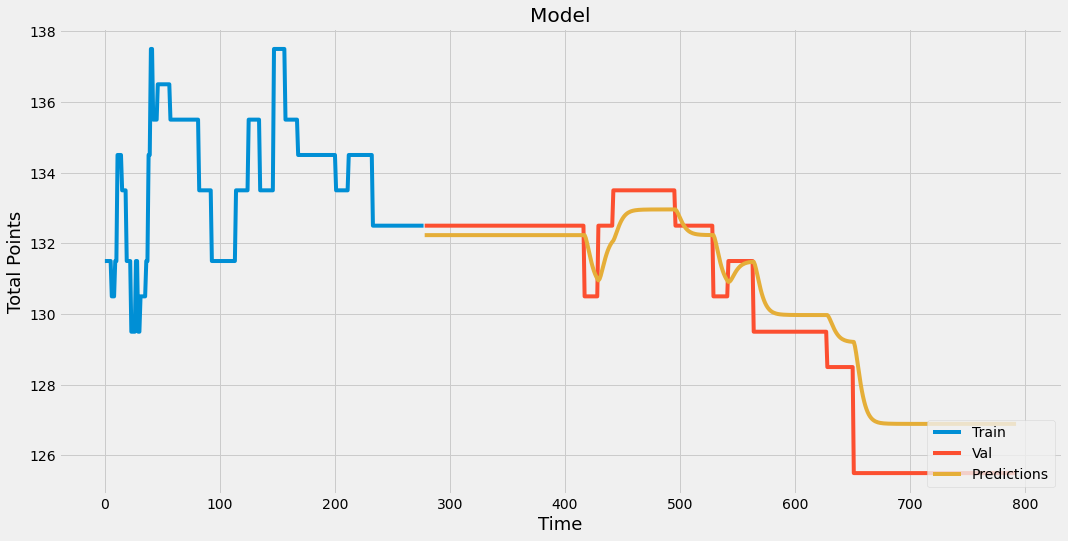

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Total Points', fontsize=18)
plt.plot(train['overPoint'])
plt.plot(valid[['overPoint', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid predicted prices
valid

,overPoint,Predictions
278,132.5,132.232529
279,132.5,132.232483
280,132.5,132.232422
281,132.5,132.232391
282,132.5,132.232346
...,...,...
788,125.5,126.891907
789,125.5,126.891907
790,125.5,126.891907
791,125.5,126.891907


In [ ]:
#Get the quote
gamefile = files.upload()
# filename = gamefile.name
filename
# game_quote pd.read_csv('2021-11-12_11-36-PM_EST_NCAAB_Villanova_Wildcats-@-UCLA_Bruins-draftkings.csv')

NameError: ignored